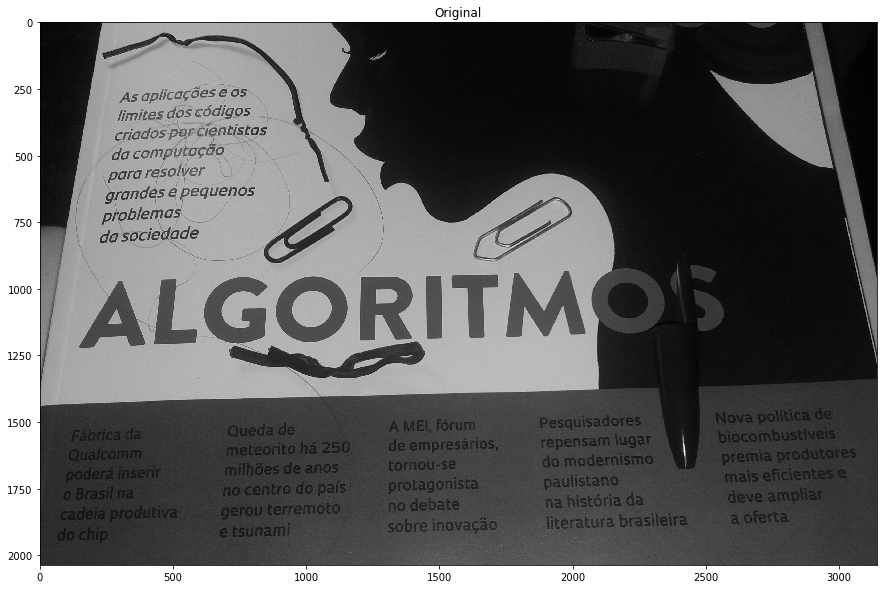

In [3]:

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 

import siamxt 

original_img = cv2.imread('../EP2/revista_fapesp.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()

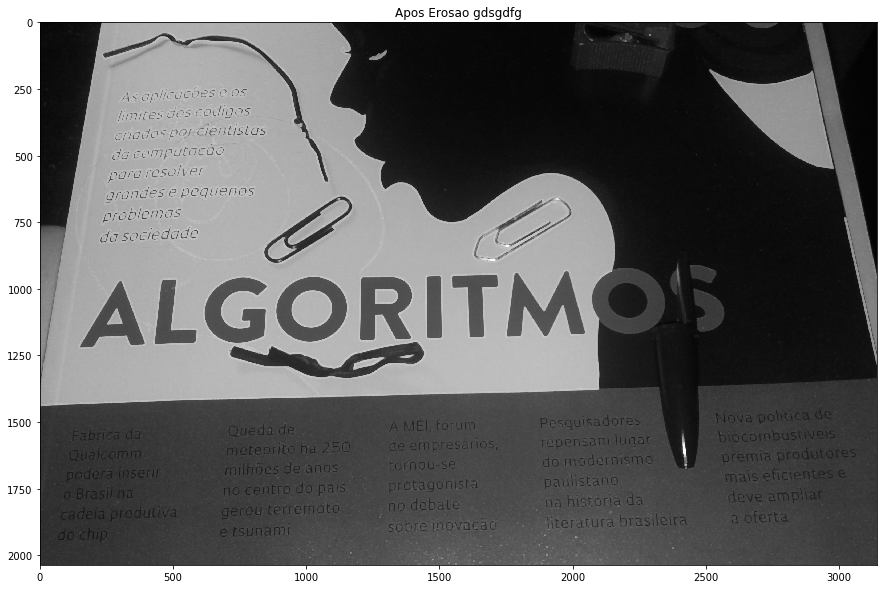

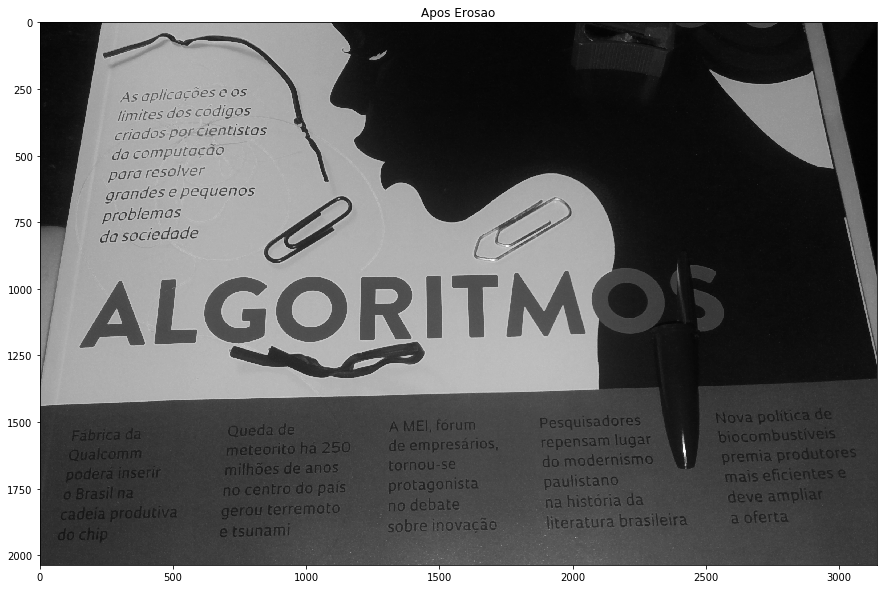

In [23]:
#Removing hair
struct = np.array([
    [True, True, True],
    [True, True, True],
    [True, True, True]])


dilation_img = ndimage.grey_dilation(original_img, structure=struct)
dilation_img = ndimage.grey_dilation(dilation_img, structure=struct)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(dilation_img, cmap='gray')
plt.title('Apos Erosao gdsgdfg')
plt.show()


erosion_img = ndimage.grey_erosion(dilation_img, structure=struct)
erosion_img = ndimage.grey_erosion(erosion_img, structure=struct)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(after_morph_img, cmap='gray')
plt.title('Apos Erosao')
plt.show()


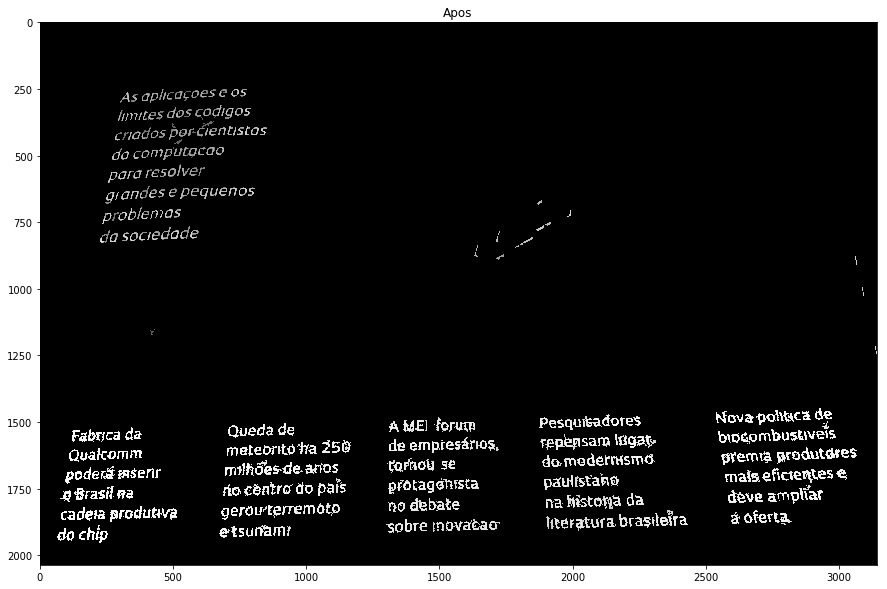

In [39]:
# Neighborhood connectivity-8
neighborhood = np.array([[False, True, False],
                         [True, True, True],
                         [False, True, False]])

img_max = after_morph_img.max()
img_neg = img_max - after_morph_img

mxt_lettters = siamxt.MaxTreeAlpha(img_neg, neighborhood)

#Size and shape thresholds
Wmin, Wmax = 6,45   
Hmin, Hmax = 15,50
rr  = 0.3

#Computing bounding-box lengths from the
#attributes stored in NA
dy = mxt_lettters.node_array[7,:] - mxt_lettters.node_array[6,:]
dx = mxt_lettters.node_array[10,:] - mxt_lettters.node_array[9,:]
area = mxt_lettters.node_array[3,:]
RR = 1.0*area/(dx*dy)

height = mxt_lettters.computeHeight()
gray_var = mxt_lettters.computeNodeGrayVar()

#Selecting nodes that fit the criteria
nodes = (dy > Hmin) & (dy < Hmax) & (dx > Wmin) & (dx < Wmax) & (height > 12) & (gray_var < 30**2) & (RR > rr)

#Filtering
mxt_lettters.contractDR(nodes)

img_result = mxt_lettters.getImage()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_result, cmap='gray')
plt.title('Apos')
plt.show()

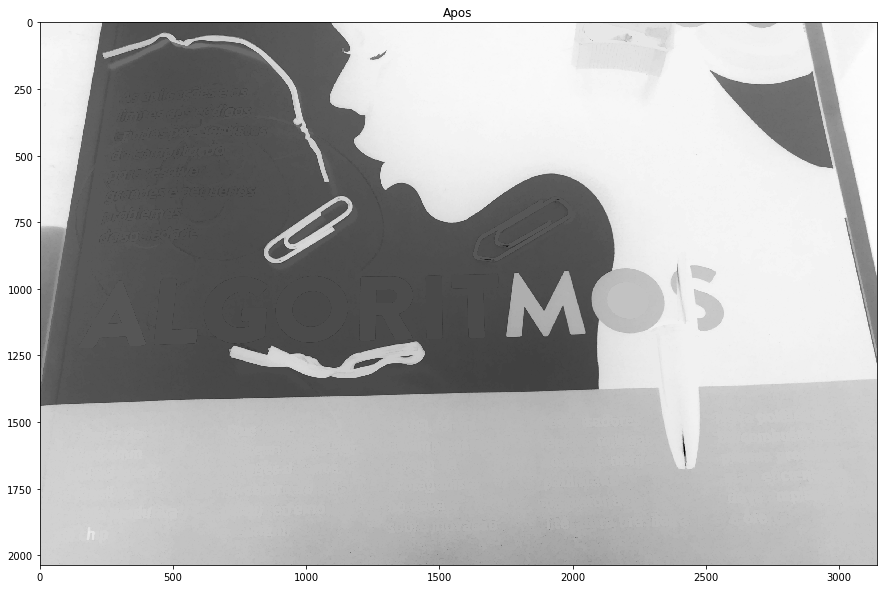

In [124]:

# Number of leaves to be preserved
n = 8

img_max = after_morph_img.max()
img_neg = img_max - after_morph_img

mxt_lettters = siamxt.MaxTreeAlpha(img_neg, neighborhood)

# TODO: trocar para volume
# Select the area attribute of the max-tree nodes from NA
area = mxt_lettters.node_array[3,:]
height = mxt_lettters.computeHeight()

volume = area * height

# Computes the area extinction values
area_ext = mxt_lettters.computeExtinctionValues(volume,"volume")

# Applies the  area extinction filter
mxt_lettters.extinctionFilter(area_ext,n)

#Recovering the image 
img_letters =  mxt_lettters.getImage()


fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_letters, cmap='gray')
plt.title('Apos')
plt.show()